### K-mean

In [6]:
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def points_avg(points):
    center = [0]*len(points[0])
    
    for point in points:
        for j in range(len(center)):
            center[j] += point[j]
    
    for i in range(len(center)):
        center[i] = center[i]/len(points)
    
    return center

In [8]:
def update_centers(assigments, data):
    new_centers = []

#   вместо этой конструкции можно использовать defaultdict из модуля collections
    point_dict = {}
    for i in assigments:
        point_dict[i] = []
#   объединяем с помощью zip предположения о кластере и объекты
    for assign, point in zip(assigments, data):
        point_dict[assign].append(point)
# считаем новые центры по средним координатам
    for key in point_dict.keys():
        new_centers.append(points_avg(point_dict[key]))
    
    return new_centers

In [9]:
def distance(a, b):
    # считаем расстояние по Евклидовой метрике
    dimention = len(a)
    sum = 0
    for i in range(dimention):
        sum += (a[i]-b[i])**2
    
    return (sum)**0.5

In [10]:
def assign_points(data, centers):
#     лист для хранения значений принадлежности к кластру
    assignments = []
#     проходим по всем точкам
    for point in data:
#         наименьшее расстояние
        shortest = float('Inf')  # positive infinity
#         индекс класстера
        shortest_index = 0
#         считаем расстояние от точки до каждого из центров
        for i in range(len(centers)):
            val = distance(point, centers[i])
            if val < shortest:
                shortest = val
                shortest_index = i
#         print(shortest, shortest_index)
        assignments.append(shortest_index)
    return assignments
        

In [11]:
def generate_first_centers(data, k):
#     случайным образом выбираем k центров кластеров
#     centers = random.sample(data,k)
    centers = []
    for i in range(k):
        centr = random.choice(data)
        centers.append(centr)
#     print(centers)
    return centers

In [12]:
def kmeans(data, k=2):
#   генерируем первые точки центров
    centers = generate_first_centers(data, k)
#   распределяем данные по кластерам
    assigments = assign_points(data, centers)
#     print(assigments)
#   переменная для запоминания предыдущих значений центров
    old_assigments = None
#   итерируем до тех пор пока значения центров не перестанут изменяться
    while assigments != old_assigments:
#       обновляем центры
        centers = update_centers(assigments, data)
#       запоминаем старые центры
        old_assigments = assigments
#       распределяем данные по кластерам
        assigments = assign_points(data, centers)
#     print(centers)
    return  centers, assigments

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [14]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)

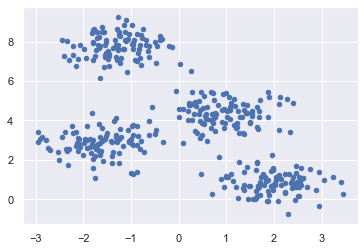

In [15]:
plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.show()

In [16]:
centers, k_y = kmeans(X, 4)

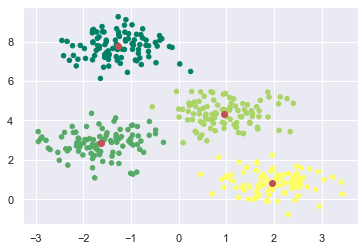

In [17]:
plt.scatter(X[:, 0], X[:, 1 ], c = k_y,  s = 20, cmap='summer')
centers = [[-1.2689694020699236, 7.756081435724197], [-1.630887147178063, 2.848246010833195], [0.9418998536418635, 4.353941283759989], [1.9566267659267418, 0.8394567136049089]]
for i in centers:
    plt.plot(i[0], i[1], 'ro')

# plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
plt.show()

Затем загрузите набор цифр из sklearn и создайте из него объект. Мы также можем найти количество строк и столбцов в этом наборе данных следующим образом:

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

 Приведенный выше вывод показывает, что этот набор данных имеет 1797 выборок с 64 признаками.

Мы можем выполнить кластеризацию, как в примере 1 выше — 

In [19]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [20]:
centers, k_y = kmeans(digits.data, 10)

In [21]:
import numpy

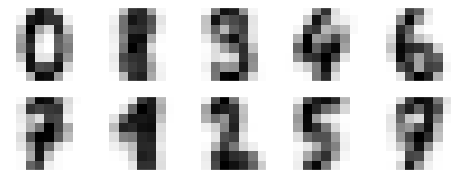

In [22]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = numpy.array(centers).reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## Image Color Clastering

In [58]:
pic = cv2.imread('pic2.jpg') # загружаем

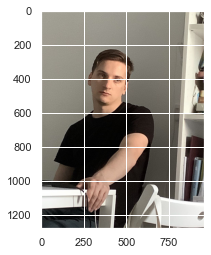

In [59]:
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB) # меняем BGR на RGB
plt.imshow(pic)
plt.show()

In [60]:
pic.shape

(1280, 960, 3)

In [61]:
from mpl_toolkits.mplot3d import Axes3D

In [62]:
x = []
y = []
z = []
for i in pic:
    for j in i:
        x.append(j[0])
        y.append(j[1])
        z.append(j[2])

In [52]:
x = np.array(x)
type(x)

numpy.ndarray

In [64]:
%qt
fig = plt.figure(figsize=(11, 11))
ax_3d = Axes3D(fig)
ax_3d.scatter(x, y, z)
plt.show()

UsageError: Line magic function `%qt` not found.
